# IBM HR Analytics Employee Attrition Modeling 

DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

Data Dictionary

Age: Age of employee
Attrition: Employee attrition status
Department: Department of work
DistanceFromHome
Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
EducationField
EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
MaritalStatus
MonthlyIncome
NumCompaniesWorked: Number of companies worked prior to IBM
WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
YearsAtCompany: Current years of service in IBM
Analysis Task:
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

Find the age distribution of employees in IBM
Explore attrition by age
Explore data for Left employees
Find out the distribution of employees by the education field
Give a bar chart for the number of married and unmarried employees
- Build up a logistic regression model to predict which employees are likely to attrite.

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [10]:
#importing dataset
IBM = pd.read_csv(r'C:\Users\BMpoma.GLOBAL\OneDrive - Jhpiego\Desktop\PYTHON DATA SCEINCE\simplelearn\data\IBM Attrition Data.csv')

Data Exploration & Cleaning 

In [13]:
#Columns within the data 
IBM.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [32]:
#Sample Analysis
print('min age is', (IBM['Age'].min()))
print('min IncomeSalary is', (IBM['MonthlyIncome'].min()))
print('min YearsAtCompany is', (IBM['YearsAtCompany'].min()))
print('max age is', (IBM['Age'].max()))
print('max MonthlyIncome is', (IBM['MonthlyIncome'].max()))
print('max YearsAtCompany is', (IBM['YearsAtCompany'].max()))

min age is 18
min IncomeSalary is 1009
min YearsAtCompany is 0
max age is 60
max MonthlyIncome is 19999
max YearsAtCompany is 40


In [16]:
#describe the layout of the dataset to get basic statistical analysis
(IBM.describe(include = 'all'))

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,NaN,6,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,No,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Married,NaN,NaN,NaN,NaN
freq,NaN,1233,961,NaN,NaN,606,NaN,NaN,673,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,9.192517,2.912925,NaN,2.721769,2.728571,NaN,6502.931293,2.693197,2.761224,7.008163
std,9.135373,NaN,NaN,8.106864,1.024165,NaN,1.093082,1.102846,NaN,4707.956783,2.498009,0.706476,6.126525
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,2.000000,NaN,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,NaN,NaN,7.000000,3.000000,NaN,3.000000,3.000000,NaN,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,NaN,NaN,14.000000,4.000000,NaN,4.000000,4.000000,NaN,8379.000000,4.000000,3.000000,9.000000


In [20]:
#checking data types
IBM.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

                                                                                             Age Distribution

In [157]:
#sns.lineplot(data=IBM, x="Attrition", y="Age")

In [158]:
#sns.barplot(data=IBM, x="Attrition", y="Age")

TypeError: 'str' object is not callable

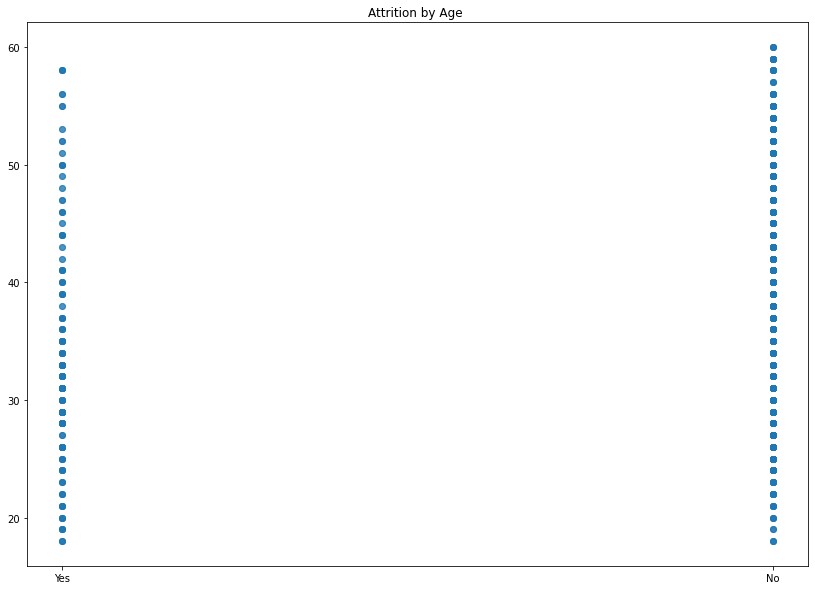

In [159]:
#explore data for Attrition by Age
plt.figure(figsize=(14,10))
plt.scatter(IBM.Attrition , IBM.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()




                                                                                          **Left Employee

In [49]:
Left_emp = IBM[IBM['Attrition'] == 'Yes']
Left_emp

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,9,3,Marketing,4,1,Married,1790,1,2,1
1442,29,Yes,Research & Development,1,4,Medical,1,4,Married,4787,9,4,2
1444,56,Yes,Research & Development,7,2,Technical Degree,4,3,Married,2339,8,1,10
1452,50,Yes,Sales,1,4,Life Sciences,2,3,Divorced,6728,7,3,6


In [56]:
#No of Employees who left
print('The number of people who left is :', (Left_emp['Attrition'].value_counts()))

The number of people who left is : Yes    237
Name: Attrition, dtype: int64


In [54]:
(Left_emp.describe(include = 'all'))

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,237.000000,237,237,237.000000,237.000000,237,237.000000,237.000000,237,237.000000,237.000000,237.000000,237.000000
unique,NaN,1,3,NaN,NaN,6,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,Yes,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Single,NaN,NaN,NaN,NaN
freq,NaN,237,133,NaN,NaN,89,NaN,NaN,120,NaN,NaN,NaN,NaN
mean,33.607595,NaN,NaN,10.632911,2.839662,NaN,2.464135,2.468354,NaN,4787.092827,2.940928,2.658228,5.130802
std,9.689350,NaN,NaN,8.452525,1.008244,NaN,1.169791,1.118058,NaN,3640.210367,2.678519,0.816453,5.949984
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1009.000000,0.000000,1.000000,0.000000
25%,28.000000,NaN,NaN,3.000000,2.000000,NaN,1.000000,1.000000,NaN,2373.000000,1.000000,2.000000,1.000000
50%,32.000000,NaN,NaN,9.000000,3.000000,NaN,3.000000,3.000000,NaN,3202.000000,1.000000,3.000000,3.000000
75%,39.000000,NaN,NaN,17.000000,4.000000,NaN,4.000000,3.000000,NaN,5916.000000,5.000000,3.000000,7.000000


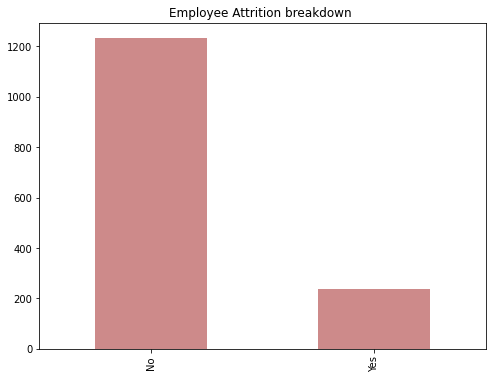

In [103]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
IBM.Attrition.value_counts().plot(kind='bar',color='brown',alpha=.55)
plt.title("Employee Attrition breakdown ")
plt.show()

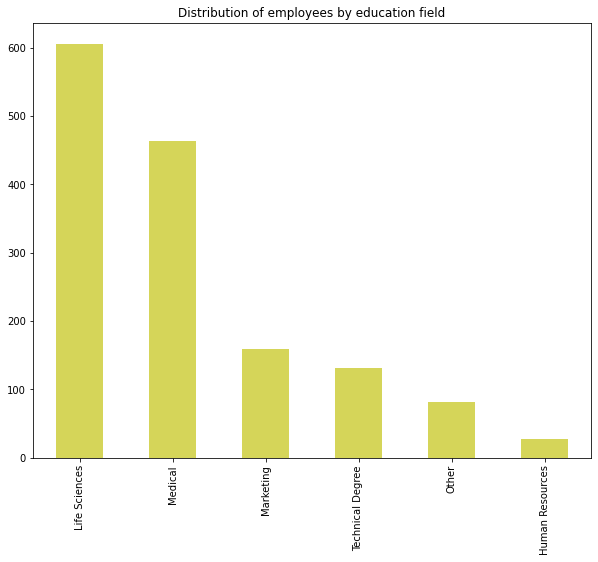

In [115]:
#Distribution of employees by education field
from matplotlib.pyplot import ylabel
plt.figure(figsize=(10,8))
IBM['EducationField'].value_counts().plot(kind='bar',color='y',alpha=.65)
plt.title('Distribution of employees by education field')
plt.ylabel = 'No of employees'
plt.show()

In [104]:
IBM

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


<AxesSubplot:>

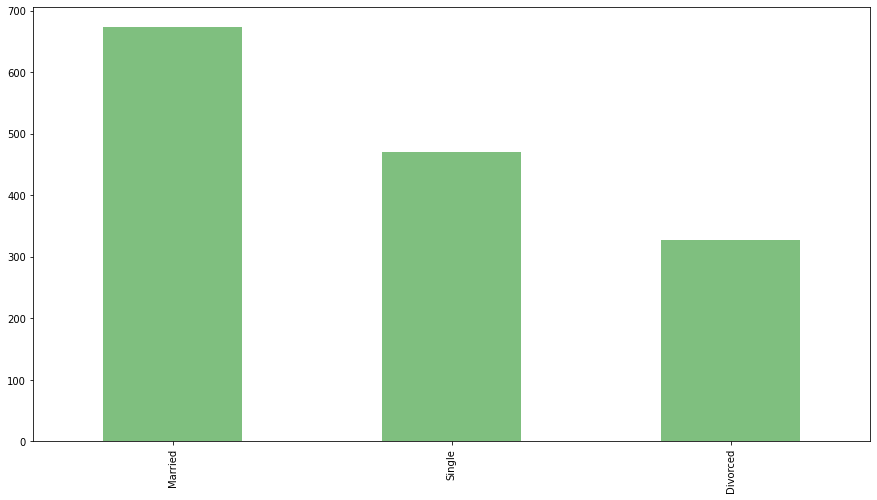

In [121]:
#A bar graph of marital Status
from numpy import size
from seaborn import barplot
IBM['MaritalStatus'].value_counts().plot(kind = 'bar' , color = 'g', alpha = .50)